# Canonical correlation analysis in python

In [1]:
import numpy as np
from scipy.linalg import sqrtm

from sklearn.cross_decomposition import CCA

import matplotlib.pyplot as plt
from seaborn import heatmap

/home/hw1012/CCA_tutorial/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Create data based on some latent variables

First let's generate some test data.
The code below is modified based on the scikit learn example of CCA.

Let's create a dataset with 100 observations with two hidden variables:

In [2]:
n = 100
np.random.seed(42)
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

For each observation, there are two domains of data. 
Six and four variables are measured in each of the domain. 
In domain 1 (x), the first latent structure 1 is underneath the first 3 variables and latent strucutre 2 for the rest.
In domain 2 (y), the first latent structure 1 is underneath every other variable and for latent strucutre 2 as well.

In [3]:
latents_x = np.array([l1, l1, l1, l2, l2, l2]).T
latents_y = np.array([l1, l2, l1, l2]).T

Now let's add some random noise on this latent structure.

In [4]:
X = latents_x + np.random.normal(size=6 * n).reshape((n, 6))
Y = latents_y + np.random.normal(size=4 * n).reshape((n, 4))

The aim of CCA is finding the correlated latent features in the two domains of data.  
Therefore, we would expect to find the hidden strucure is laid out in the latent components. 

## SVD algebra solution

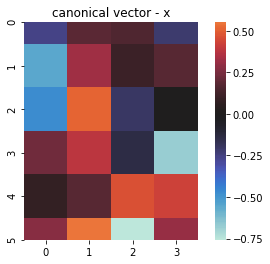

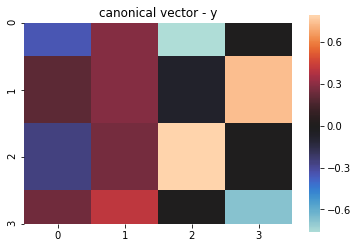

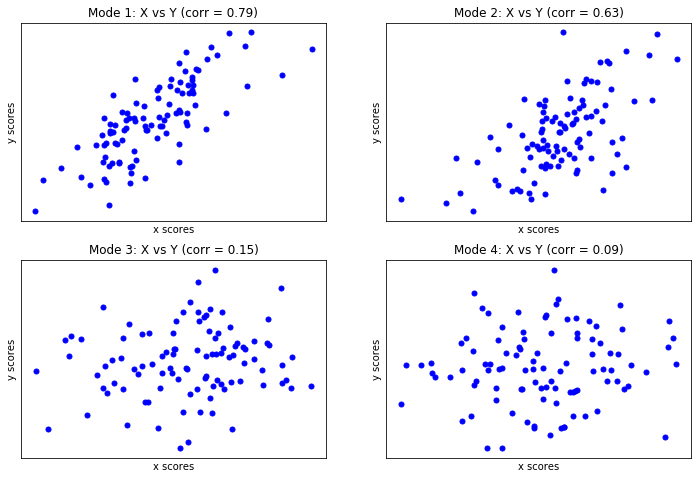

In [5]:
N = np.min([X.shape[1], Y.shape[1]])

Cx, Cy = np.corrcoef(X.T), np.corrcoef(Y.T)
Cxy =  np.corrcoef(X.T, Y.T)[:X.shape[1], X.shape[1]:]
Cyx =  Cxy.T

sqrt_x, sqrt_y = np.matrix(sqrtm(Cx)), np.matrix(sqrtm(Cy))
isqrt_x, isqrt_y = sqrt_x.I, sqrt_y.I

W = isqrt_x * Cxy * isqrt_y
u, s, v = np.linalg.svd(W)

a = np.dot(u, isqrt_x.T[:, :N]) / np.std(X) # scaling
b = np.dot(v, isqrt_y).T / np.std(Y)

X_score, Y_score = X.dot(a), Y.dot(b)

# plotting
plt.figure()
heatmap(a, square=True, center=0)
plt.title("canonical vector - x")
plt.figure()
heatmap(b, square=True, center=0)
plt.title("canonical vector - y")

plt.figure(figsize=(12, 8))
for i in range(N):

    plt.subplot(221 + i)
    plt.scatter(np.array(X_score[:, i]).reshape(100), 
                np.array(Y_score[:, i]).reshape(100), 
                marker="o", c="b", s=25)
    plt.xlabel("x scores")
    plt.ylabel("y scores")
    plt.title('Mode %i: X vs Y (corr = %.2f)' %(i + 1, s[i]))
    plt.xticks(())
    plt.yticks(())

## Solution Using SVD Only
http://numerical.recipes/whp/notes/CanonCorrBySVD.pdf

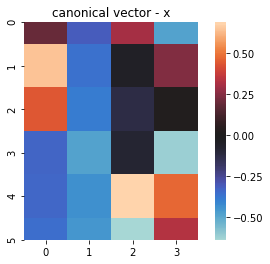

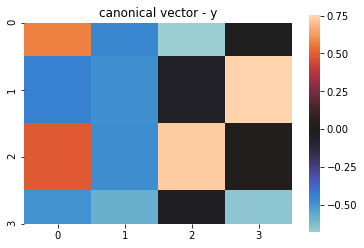

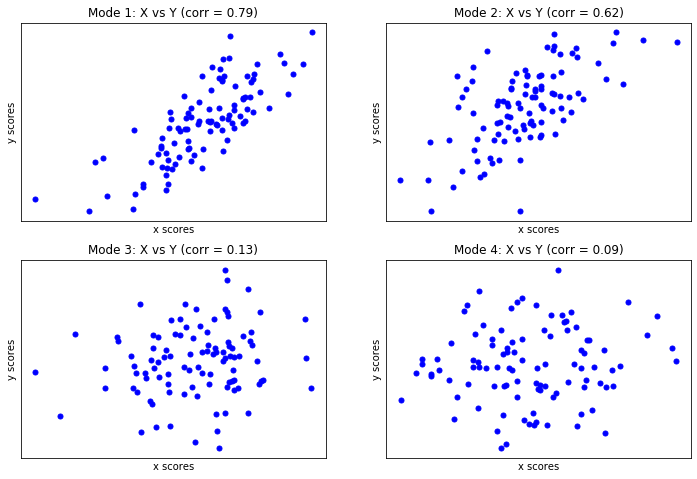

In [6]:
ux, sx, vx = np.linalg.svd(X, 0)
uy, sy, vy = np.linalg.svd(Y, 0)
u, s, v = np.linalg.svd(ux.T.dot(uy), 0)

a = (vx.T).dot(u)
b = (vy.T).dot(v.T)

X_score, Y_score = X.dot(a), Y.dot(b)

# plotting
plt.figure()
heatmap(a, square=True, center=0)
plt.title("canonical vector - x")
plt.figure()
heatmap(b, square=True, center=0)
plt.title("canonical vector - y")


plt.figure(figsize=(12, 8))
for i in range(N):

    plt.subplot(221 + i)
    plt.scatter(np.array(X_score[:, i]).reshape(100), 
                np.array(Y_score[:, i]).reshape(100), 
                marker="o", c="b", s=25)
    plt.xlabel("x scores")
    plt.ylabel("y scores")
    plt.title('Mode %i: X vs Y (corr = %.2f)' %(i + 1, s[i]))
    plt.xticks(())
    plt.yticks(())

## Sci-kit learn

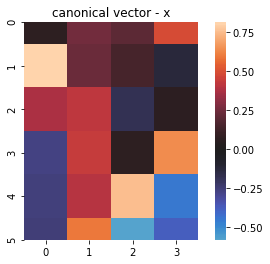

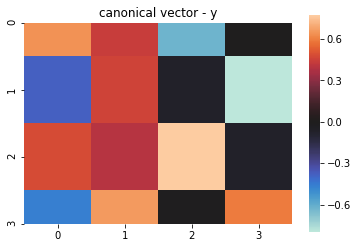

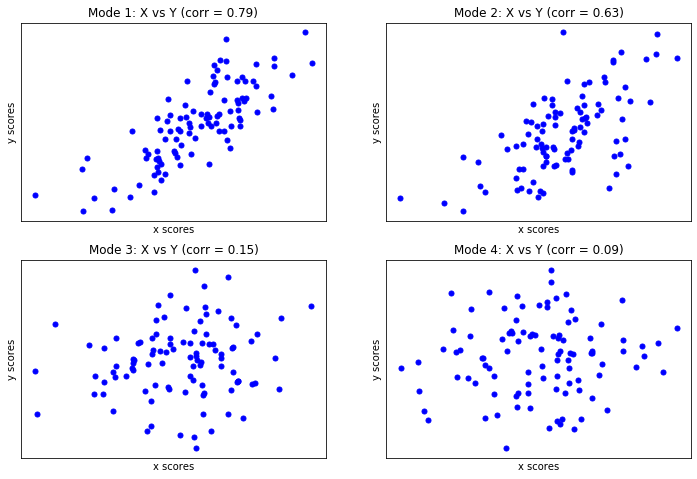

In [7]:
cca = CCA(n_components=4)
cca.fit(X, Y)
s = np.corrcoef(cca.x_scores_.T, cca.y_scores_.T).diagonal(offset=cca.n_components)
a = cca.x_weights_
b = cca.y_weights_

X_score, Y_score = X.dot(a), Y.dot(b)

# plotting
plt.figure()
heatmap(a, square=True, center=0)
plt.title("canonical vector - x")
plt.figure()
heatmap(b, square=True, center=0)
plt.title("canonical vector - y")


plt.figure(figsize=(12, 8))
for i in range(N):

    plt.subplot(221 + i)
    plt.scatter(np.array(X_score[:, i]).reshape(100), 
                np.array(Y_score[:, i]).reshape(100), 
                marker="o", c="b", s=25)
    plt.xlabel("x scores")
    plt.ylabel("y scores")
    plt.title('Mode %i: X vs Y (corr = %.2f)' %(i + 1, s[i]))
    plt.xticks(())
    plt.yticks(())